In [21]:
import torch
import numpy as np
import os

In [22]:
pathReq=os.getcwd()+'/'
stats=np.load(pathReq+'allStats20210609BvsP.npy')

In [23]:
features=stats[:,:-1]
labels=stats[:,-1]

In [24]:
import matplotlib.pyplot as plt

h=['PA','AB','R','H','2B','3B','HR',
           'RBI','BB','IBB','SO','HBP','SH','SF','GDP','SB','CS']#batting only
hP=['W','IP','H_', 'R_', 'ER_', 'BB_', 'SO_', 'HR_', 'HBP_', 'AB_', '2B_', '3B_', 'IBB_','Pit', 'Str', 'StL', 'StS']
hBvsP=['PA2','AB2','H2', '1B2','2B2','3B2','HR2','BB2','SO2','AVG2','OBP2','SLG2'] #BvsP
hTotal=h+hP+hBvsP
m=dict()

for i, hh in enumerate(hTotal):
    m[hh]=i
    
print(m)



{'PA': 0, 'AB': 1, 'R': 2, 'H': 3, '2B': 4, '3B': 5, 'HR': 6, 'RBI': 7, 'BB': 8, 'IBB': 9, 'SO': 10, 'HBP': 11, 'SH': 12, 'SF': 13, 'GDP': 14, 'SB': 15, 'CS': 16, 'W': 17, 'IP': 18, 'H_': 19, 'R_': 20, 'ER_': 21, 'BB_': 22, 'SO_': 23, 'HR_': 24, 'HBP_': 25, 'AB_': 26, '2B_': 27, '3B_': 28, 'IBB_': 29, 'Pit': 30, 'Str': 31, 'StL': 32, 'StS': 33, 'PA2': 34, 'AB2': 35, 'H2': 36, '1B2': 37, '2B2': 38, '3B2': 39, 'HR2': 40, 'BB2': 41, 'SO2': 42, 'AVG2': 43, 'OBP2': 44, 'SLG2': 45}


In [25]:
def normStats(stats, forInference):
    
    h=['PA','AB','R','H','2B','3B','HR',
           'RBI','BB','IBB','SO','HBP','SH','SF','GDP','SB','CS']#batting only
    # hP=['Dec','IP','H_','R_','ER','BB_','SO_','HR_','HBP_','AB_','2B_','3B_','IBB_','Pit','Str','StL','StS']#had to add underscores to some to separate from h
    hP=['W','IP','H_', 'R_', 'ER_', 'BB_', 'SO_', 'HR_', 'HBP_', 'AB_', '2B_', '3B_', 'IBB_','Pit', 'Str', 'StL', 'StS']
    hBvsP=['PA2','AB2','H2', '1B2','2B2','3B2','HR2','BB2','SO2','AVG2','OBP2','SLG2'] #BvsP
    hTotal=h+hP+hBvsP
    m=dict()
    for i, hh in enumerate(hTotal):
        m[hh]=i
    print(m)
    hTotal=h+hP+hBvsP
    toCount=hTotal

    toCount=h+hP#['PA','AB','R','H','2B','3B','HR','RBI','BB']
             
    
    finalFeatures=np.zeros((stats.shape[0],len(toCount)))
    finalInference=np.zeros((forInference.shape[0],len(toCount)))     
    
    
    for r in range(finalFeatures.shape[0]):        
        for i, cat in enumerate(toCount):
            if cat in h: # to normalize hitting stats by PA
                if stats[r, m['PA']]>0:
                    finalFeatures[r,m[cat]]=stats[r, m[cat]]/stats[r, m['PA']] 
                else:
                    finalFeatures[r,m[cat]]=stats[r, m[cat]]
            if cat in hP: # to normalize pitching stats by IP
                if stats[r, m['IP']]>0:
                    finalFeatures[r,m[cat]]=stats[r, m[cat]]/stats[r, m['IP']]  
                else:
                    finalFeatures[r,m[cat]]=stats[r, m[cat]]
            if cat in hBvsP: # to normalize BvsP stats by PA2
                if stats[r, m['PA2']]>0:
                    finalFeatures[r,m[cat]]=stats[r, m[cat]]/stats[r, m['PA2']]
                else:
                    finalFeatures[r,m[cat]]=stats[r, m[cat]]
                
    for r in range(finalInference.shape[0]):
        for i, cat in enumerate(toCount):            
            if cat in h: # to normalize hitting stats by PA                
                if forInference[r, m['PA']]>0:
                    finalInference[r,m[cat]]=forInference[r,m[cat]]/forInference[r, m['PA']]
                else:
                    finalInference[r,m[cat]]=forInference[r,m[cat]]
            if cat in hP: # to normalize pitching stats by IP                
                if forInference[r, m['IP']]>0:
                    finalInference[r,m[cat]]=forInference[r,m[cat]]/forInference[r, m['IP']]
                else:
                    finalInference[r,m[cat]]=forInference[r,m[cat]]
            if cat in hBvsP: # to normalize BvsP stats by PA2      
                if forInference[r, m['PA2']]>0:
                    finalInference[r,m[cat]]=forInference[r,m[cat]]/forInference[r, m['PA2']]
                else:
                    finalInference[r,m[cat]]=forInference[r,m[cat]]

    return finalFeatures, finalInference

finalFeatures, finalInference=normStats(stats, stats)

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler

# features=torch.tensor(finalFeatures) #torch.tensor(stats[:,skippingFrom:skippingTo])
# labels=torch.tensor(stats[:,-1])

# forInferenceStats=torch.tensor(finalInference) #torch.tensor(forInference[:,skippingFrom:skippingTo])

# pctTotal=(1-torch.mean(labels))*2
# finalNo=(features.size()[0]*pctTotal).int()

# balancedFeatures=torch.zeros(0,features.size()[1])
# balancedLabels=torch.zeros(0,1)

# c0=0
# c1=0

# for smpl, l in enumerate(labels):
#   if l==1 and c1<(finalNo//2):
#     #balancedFeatures[smpl]=features[smpl]
#     balancedFeatures=np.vstack((balancedFeatures, features[smpl]))
#     balancedLabels=np.vstack((balancedLabels, l))
# #     balancedLabels[smpl]=l
#     c1+=1
#   if l==0 and (c1+c0)<finalNo:
#     balancedFeatures=np.vstack((balancedFeatures, features[smpl]))
#     balancedLabels=np.vstack((balancedLabels, l))
#     c0+=1

   
# X_train, X_test, y_train, y_test = train_test_split(torch.tensor(balancedFeatures), torch.tensor(balancedLabels.squeeze()), test_size=0.2, random_state=42)

# # X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# scaler = StandardScaler()

# x_norm=torch.tensor(scaler.fit_transform(X_train))

# x_norm_test=torch.tensor(scaler.fit_transform(X_test))

# inference_norm=torch.tensor(scaler.fit_transform(forInferenceStats))


    

{'PA': 0, 'AB': 1, 'R': 2, 'H': 3, '2B': 4, '3B': 5, 'HR': 6, 'RBI': 7, 'BB': 8, 'IBB': 9, 'SO': 10, 'HBP': 11, 'SH': 12, 'SF': 13, 'GDP': 14, 'SB': 15, 'CS': 16, 'W': 17, 'IP': 18, 'H_': 19, 'R_': 20, 'ER_': 21, 'BB_': 22, 'SO_': 23, 'HR_': 24, 'HBP_': 25, 'AB_': 26, '2B_': 27, '3B_': 28, 'IBB_': 29, 'Pit': 30, 'Str': 31, 'StL': 32, 'StS': 33, 'PA2': 34, 'AB2': 35, 'H2': 36, '1B2': 37, '2B2': 38, '3B2': 39, 'HR2': 40, 'BB2': 41, 'SO2': 42, 'AVG2': 43, 'OBP2': 44, 'SLG2': 45}


In [26]:
stats.shape

(5202, 47)

(array([2.300e+02, 1.179e+03, 3.333e+03, 3.850e+02, 4.600e+01, 2.300e+01,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

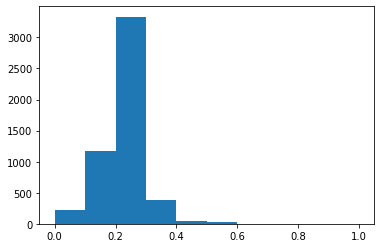

In [32]:
plt.hist(finalFeatures[:,m['H']])

In [66]:
features=features[np.where(features[:,m['PA']]>0)[0]]
labels=labels[np.where(features[:,m['PA']]>0)[0]]
print(features.shape)
for i, s in enumerate(features):
    features[i]=features[i]/s[m['PA']]+1 #normalize over axis1

(4547, 46)


In [67]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# x_norm=torch.tensor(scaler.fit_transform(features))#normalize over axis0

(array([587., 461., 535., 440., 485., 371., 307., 162.,  68.,  17.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <a list of 10 Patch objects>)

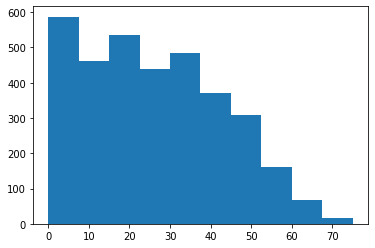

In [33]:
# over100f=stats[np.where(stats[:,m['AB']]>100)[0],:-1]
# over100l=stats[np.where(stats[:,m['AB']]>100)[0], -1]

i=np.where(labels==1)[0]
plt.hist(features[i,m['H']])

In [78]:
features[:10]

array([[1.00000000e+00, 8.00000000e-01, 2.00000000e-01, 4.00000000e-01,
        0.00000000e+00, 0.00000000e+00, 2.00000000e-01, 2.00000000e-01,
        2.00000000e-01, 2.00000000e-01, 4.00000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.00000000e-01, 4.00000000e-01,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.00000000e-01, 2.00000000e-01, 2.00000000e-01, 1.00000000e-01,
        1.33400000e-01, 4.00000000e-01],
       [1.00000000e+00, 7.77777778e-01, 2.22222222e-01, 4.44444444e-01,
        0.00000000e+00, 0.00000000e+00, 2.22222222e-01, 4.44444444e-01,
        2.22222222e-01,

In [35]:
features[:5]

array([[1.        , 0.8       , 0.2       , 0.4       , 0.        ,
        0.        , 0.2       , 0.2       , 0.2       , 0.2       ,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.6       ,
        0.4       , 0.2       , 0.        , 0.        , 0.        ,
        0.2       , 0.2       , 0.2       , 0.1       , 0.1334    ,
        0.4       ],
       [1.        , 0.77777778, 0.22222222, 0.44444444, 0.        ,
        0.        , 0.22222222, 0.44444444, 0.22222222, 0.11111111,
        0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [42]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(features, labels)
print(clf.coef_)


[ 0.00000000e+00  6.45314037e-04  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  6.27472513e-05  0.00000000e+00
 -0.00000000e+00 -1.27690898e-03 -7.68686113e-03 -0.00000000e+00
  3.89421514e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [43]:
np.where(clf.coef_>0)

(array([ 1, 30, 36]),)

In [36]:
!pip install sklearn

  Using cached https://files.pythonhosted.org/packages/1e/7a/dbb3be0ce9bd5c8b7e3d87328e79063f8b263b2b1bfa4774cb1147bfcd3f/sklearn-0.0.tar.gz
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=10bbb14ccf41277fc4f566411bfa1576b001ac25da4a7063f2451f2694715548
  Stored in directory: /home/adimn/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
